### Exploring the impact of clustering on the quality of SMOTE preprocessing. Comparative analysis
##### Maksym Malicki, Jacek Glapiński
###### Wrocław University of Technology
In this notebook we present a comparative analysis of the impact of clustering using various methods on the quality of SMOTE preprocessing.

#### load_dataset()
This method allows us to load datasets listed in the paper.

In [1]:
import numpy as np

def load_dataset(file_path):
    data = []
    labels = []

    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('@'):
                continue
            line_data = line.strip().split(',')
            sample_class = line_data[-1].strip().lower().replace(" ", "")
            label = 1 if sample_class == 'positive' else 0
            converted_data = []
            for x in line_data[:-1]:
                try:
                    converted_data.append(float(x))
                except ValueError:
                    converted_data.append(ord(x))
            data.append(converted_data)
            labels.append(label)
    X = np.array(data)
    y = np.array(labels)

    return X, y

#### Implementacja SMOTE_Medium i testy

In [2]:
#https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c

from random import randrange, uniform
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

def SMOTE_ByMedium(sample: np.array, N: int, k: int) -> np.array:
    
    T, num_attrs = sample.shape
    
    # If N is less than 100%, randomize the minority class samples as only a random percent of them will be SMOTEd
    if N < 100:
        T = round(N / 100 * T)
        N = 100
    # The amount of SMOTE is assumed to be in integral multiples of 100
    N = int(N / 100)

    synthetic = np.zeros([T * N, num_attrs])
    new_index = 0
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(sample.values)
    def populate(N, i, nnarray):
        
        nonlocal new_index
        nonlocal synthetic
        nonlocal sample
        while N != 0:
            nn = randrange(1, k+1)
            for attr in range(num_attrs):
                dif = sample.iloc[nnarray[nn]][attr] - sample.iloc[i][attr]
                gap = uniform(0, 1)
                synthetic[new_index][attr] = sample.iloc[i][attr] + gap * dif
            new_index += 1
            N = N - 1
    
    for i in range(T):
        nnarray = nbrs.kneighbors(sample.iloc[i].values.reshape(1, -1), return_distance=False)[0]
        populate(N, i, nnarray)
    
    return synthetic




In [3]:
#Smote test
# tutaj jest tymczasowy test Smote żeby ogarnąć poprawne liczebności
import plotly.express as px
temp_Cluter = np.array([[1,3,2,4,6,2,1,3,6,4,5,1,5,2,6,8,7,9,5,8,6,8,7,9,5,7,4,5,7],
                        [3,1,2,6,2,5,4,3,2,1,3,3,2,1,6,5,7,6,4,8,9,5,8,4,7,5,6,8,4]])
temp_Cluter_y = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1])
print('temp_Cluter shape: ',temp_Cluter.shape)
print('temp_Cluter_y shape: ',temp_Cluter_y.shape)
fig = px.scatter(x=temp_Cluter[0],y=temp_Cluter[1],title="Dane wejściowe")
fig.show()

temp_Cluter shape:  (2, 29)
temp_Cluter_y shape:  (29,)


Liczebność zbioru wejściowego:

In [4]:
import math
# teraz określamy ile chcemy próbek dorobić:
# chcemy mieć 100 próbek
desired = 100
print('Chcemy uzyskać 100 próbek wyjściowych')
#obecnie mamy size próbek
size  = temp_Cluter.shape[1]

todoSamples = int(((desired/size)-1 )*100)
print("Przewidujemy, że dosaniemy próbek wyjściowych: ", (todoSamples/100+1)*len(temp_Cluter_y))
print((todoSamples/100+1))
print(math.floor(todoSamples/100)+1)
temp_out = SMOTE_ByMedium(pd.DataFrame(temp_Cluter.T), todoSamples, 5)

Chcemy uzyskać 100 próbek wyjściowych
Przewidujemy, że dosaniemy próbek wyjściowych:  99.76
3.44
3


In [5]:
temp_out.T
print(len(temp_out.T[0]))
print(len(temp_Cluter[0]))
print(len(temp_out.T[0])+len(temp_Cluter[0]))

58
29
87


In [6]:
temp_Cluter_OUT = [[*temp_Cluter[0],*temp_out.T[0]],[*temp_Cluter[1],*temp_out.T[1]]]
print(temp_Cluter_OUT)

[[1, 3, 2, 4, 6, 2, 1, 3, 6, 4, 5, 1, 5, 2, 6, 8, 7, 9, 5, 8, 6, 8, 7, 9, 5, 7, 4, 5, 7, 1.0, 1.587810625354508, 3.0, 2.040405985465985, 2.0941569016451558, 2.5336880763908614, 4.201195935518433, 5.119454129483451, 5.07558879706675, 5.07737169724823, 1.4188067272210125, 2.62856631280611, 1.131645850657006, 1.0, 3.0, 2.0551769447858335, 5.3487620890315455, 6.0, 3.456564925807782, 4.021711673609371, 5.070597611955181, 5.810612185784286, 2.1685827173168595, 1.5523245663369813, 5.8233265766390945, 5.0, 2.1817000531338784, 2.6813475755246845, 5.005633414061548, 6.306595751485898, 8.0, 8.176672265457231, 6.456112159585859, 7.935108446791035, 8.43412958039443, 7.4727665697728956, 4.825821117208301, 5.0, 7.827803259827266, 7.260379908698269, 6.7050725320093125, 6.93219219680106, 7.912666514667299, 8.0, 6.521799296800318, 6.673269069720194, 8.924786550857084, 8.676311611093773, 5.0, 5.4575237313780125, 6.372503198297764, 7.0, 5.630183578547874, 2.976129040622298, 6.914196067710446, 5.0, 7.66462

In [7]:
fig = px.scatter(x= temp_out.T[0], y= temp_out.T[1],title='Wygenerowane')
fig.show()

In [8]:
fig = px.scatter(x= temp_Cluter_OUT[0], y= temp_Cluter_OUT[1], title= 'Wygenerowane + wejściowe o łącznej liczbie równej desired')
fig.show()
len(temp_Cluter_OUT[0])

87

#### Clustering with SMOTE

In [9]:
from sklearn.cluster import KMeans, MeanShift

def oversample_clustered_data(X, y, X_minority, y_minority, X_majority, y_majority, cluster_labeled_data):
    #wygenerowane próbki mniejszościowe wrzucamy tutaj:
    X_generated = []

    # Do oceny ile próbek trzeba będzie wygenerować trzeba przeliczyć różnicę między liczebnością klasy mniejszościowej i większościowej, będzie to potrzebne później w pętli dla każego z klastrów
    majority_minority_difference =  list(y).count(0) - list(y).count(1)
    if(majority_minority_difference < 0):
        print("[ERR] Monority class has grater count to Majority class")
        exit()
    # Do oceny ile próbek będzie trzeba wygenerować potrzebne też będzie informacja o liczbności klasy mniejszościowej
    minority_count = list(y).count(1)

    # Dla każdego z klastrów:
    cluster_labels = np.unique(cluster_labeled_data) #  pobranie info jakie mamy labele klastrów [0,1,...]

    # Wszystkie wygenerowane syntetycznie obiekty trafią tutaj
    syntetic_data = []
    for cluster in cluster_labels:
        # w pierwszej kolejności filtrujemy indeksy zbioru mniejszościowego aby pozostawić tylko indeksy należące do klastra który w danej iteracji pętli analizujemy
        cluster_samples_indices_minority = np.where(cluster_labeled_data == cluster)[0]
        if len(cluster_samples_indices_minority)<4:
            continue
        # ustalamy ile próbek trzeba wygenerować w tym klastrze
        # ustalamy procentowo liczebność (udział) klastra względem całej klasy mniejszościowej
        percentage_of_count = len(cluster_samples_indices_minority)/minority_count
        # zabezpieczenie jeśli coś na tym etapie szłoby bardzo nie tak
        if(percentage_of_count>1 or percentage_of_count<0):
            print("Kurza twarz.. something is no yes! Procenty nie mogą być większe niż 100 ani mniejsze niż 0")
            exit()
        
        #następnie przemnarzamy udział procentowy klastra przez różnicę między zbiorem większościowym i mniejszościowym uzyskując ilość próbek do augmentacji
        num_of_samples_to_generate_in_this_cluster = percentage_of_count * majority_minority_difference

        # Do samej funkcji augmentacji wymagana jest warość procentowa gdzie 100 to 100% określająca ile próbek ma zostać wygenerowanych względem danych wejściowych
        # w tym celu należy podzielić ilość próbek które chcemy wygenerować przez liczbę próbek które posiadamy już
        todoSamples = 100*(num_of_samples_to_generate_in_this_cluster/len(cluster_samples_indices_minority))

        # Teraz musimy niestety przejść z np.array na dataframe bo w ten sposób działa funkcja ale robimy to już w parametrze funkcji
        # Oversampling... totaj k = 5.. jest to hiperparametr który nie wydaje się być istotny w tej implementacji. Jeśli będą większe zmiany trzeba spojrzeć na niego
        temp_out = SMOTE_ByMedium(pd.DataFrame(X_minority[cluster_samples_indices_minority]), todoSamples, 3)
        syntetic_data.append(temp_out)
        
        #Ta implementacja Smote jeśli tworzy więcej niż 100% próbek z próbek które dostała traci informację o części dziesiętnej procentów - to powoduje, że powstaje mniej resamplowanych próbek
        if todoSamples>100:
            todoSamples_2 = todoSamples%100
            temp_out_2 = SMOTE_ByMedium(pd.DataFrame(X_minority[cluster_samples_indices_minority]),todoSamples_2 , 3)
            syntetic_data.append(temp_out_2)
        
        

    #tutaj wymagane jest połączenie wyjścia syntetic_data razem z X i y
    X_resampled = X
    y_resampled  = y

    for clusterOUT in syntetic_data:
        X_resampled = np.block([[X_resampled], [clusterOUT]])
        y_resampled = [*y_resampled,*np.ones(clusterOUT.shape[0])]# jedynki dla tego, że 1 to klasa mniejszościowa
    return X_resampled, y_resampled

def KMeans_SMOTE(X, y, num_clusters):
    # Wybieramy indeksy klasy mniejszościowej i większościowej
    minority_indices = np.where(y == 1)[0] # dla naszych datasetów klasa o labelu 1 zawsze jest mniejszościowa
    majority_indices = np.where(y == 0)[0]

    # Sortujemy Dane i Labele na minority i majority
    X_minority = X[minority_indices]
    y_minority = y[minority_indices]

    X_majority = X[majority_indices]
    y_majority = y[majority_indices]
    
    # Wykonujemy klasteryzację na klasie mniejszościowej
    kmeans_labels_minority = KMeans(n_clusters=num_clusters, random_state=0, n_init="auto").fit_predict(X_minority)

    # Zwrócona wartość to indeksy odwołujące się jedynie do klasy mniejszościowej! trzeba o tym teraz pamiętać.
    return oversample_clustered_data(X, y, X_minority, y_minority, X_majority, y_majority, kmeans_labels_minority)


def MeanShift_SMOTE(X, y):
    # TAK WIEM,TO POWINNA BYĆ FUNKCJA, BO WIĘKSZOŚĆ LINIJEK MEANSHIFT_SMOTE I KMEANS_SMOTE SIĘ POWTARZA ... może kiedyś tu upiększymy
    # Wybieramy indeksy klasy mniejszościowej i większościowej
    minority_indices = np.where(y == 1)[0] # dla naszych datasetów klasa o labelu 1 zawsze jest mniejszościowa
    majority_indices = np.where(y == 0)[0]

    # Sortujemy Dane i Labele na minority i majority
    X_minority = X[minority_indices]
    y_minority = y[minority_indices]

    X_majority = X[majority_indices]
    y_majority = y[majority_indices]
    
    # Wykonujemy klasteryzację na klasie mniejszościowej
    mean_shift_labels_minority = MeanShift().fit_predict(X_minority)
    return oversample_clustered_data(X, y, X_minority, y_minority, X_majority, y_majority, mean_shift_labels_minority)

#### Przedstawienie wyników preprocessingu z uzyciem metod redukcji wymiarów (t-SNE, PCA)

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px

def display_cluster_plots_before_and_after():
    file_path = 'mild-imbalance/pima.dat'
    X, y = load_dataset(file_path)

    oversamplings = ["KMeansSMOTE", "MeanShiftSMOTE"]
    features_reduction_methods = ["PCA", "t-SNE"]
    for features_reduction_method in features_reduction_methods:
        if features_reduction_method == 'PCA':
            reductor = PCA(n_components=2)
        else:
            reductor = TSNE(n_components=2)
        X_transformed = reductor.fit_transform(X)
        fig = px.scatter(x=X_transformed[:, 0], y=X_transformed[:, 1], color=y)
        fig.update_layout(
            title=f"{features_reduction_method} visualization of the dataset before oversampling",
            xaxis_title="First Principal Component",
            yaxis_title="Second Principal Component",
        )
        fig.show()
        for oversampling in oversamplings:
            if oversampling == "KMeansSMOTE":
                X_resampled, y_resampled = KMeans_SMOTE(X, y, 3)
            else:
                X_resampled, y_resampled = MeanShift_SMOTE(X, y)
            X_transformed = reductor.fit_transform(X_resampled)
            fig = px.scatter(x=X_transformed[:, 0], y=X_transformed[:, 1], color=y_resampled)
            fig.update_layout(
                title=f"{features_reduction_method} visualization of {oversampling} oversampled dataset",
                xaxis_title="First Principal Component",
                yaxis_title="Second Principal Component",
            )
            fig.show()
display_cluster_plots_before_and_after()

#### Sprawdzenie który ze zbiorów jest Większościowy

In [11]:
# tymczasowy algorytm do analizy która z klas jest mniejszościowa
def ReturnsMinorityLabel(file_path):
    labels = []
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('@'):
                continue
            line_data = line.strip().split(',')
            sample_class = line_data[-1].strip().lower().replace(" ", "")
            label = 1 if sample_class == 'positive' else 0
            labels.append(label)
    countOf0 = labels.count(0)
    countOf1 = labels.count(1)
    print("---------STATS---------") 
    print('countOf0: ',countOf0)
    print('countOf1: ',countOf1)
    print("----------OUT----------") 
    if countOf0 == countOf1:
        print("!!!!!kurcze zbiorki są zbalansowane!!!!!!")
        return(-1)
    if countOf0 > countOf1:
        print("Więcej klasy 0")
        return(0)
    if countOf0 < countOf1:
        print("Więcej klasy 1")
        return(1)

import os

#sprawdzenie czy działa

directories = ['mild-imbalance', 'high-imbalance']
results_of_test = []
for directory in directories:
    print(f"Processing files in directory: {directory}")
    files = os.listdir(directory)
    
    for file_name in files:
        file_path = os.path.join(directory, file_name)
        print(f"File: {file_path}")
        results_of_test.append(ReturnsMinorityLabel(file_path))
    
print(results_of_test)
print(results_of_test.count(1))

Processing files in directory: mild-imbalance
File: mild-imbalance\page-blocks0.dat
---------STATS---------
countOf0:  4913
countOf1:  559
----------OUT----------
Więcej klasy 0
File: mild-imbalance\pima.dat
---------STATS---------
countOf0:  500
countOf1:  268
----------OUT----------
Więcej klasy 0
File: mild-imbalance\segment0.dat
---------STATS---------
countOf0:  1979
countOf1:  329
----------OUT----------
Więcej klasy 0
File: mild-imbalance\vehicle0.dat
---------STATS---------
countOf0:  647
countOf1:  199
----------OUT----------
Więcej klasy 0
File: mild-imbalance\vehicle1.dat
---------STATS---------
countOf0:  629
countOf1:  217
----------OUT----------
Więcej klasy 0
File: mild-imbalance\vehicle2.dat
---------STATS---------
countOf0:  628
countOf1:  218
----------OUT----------
Więcej klasy 0
File: mild-imbalance\vehicle3.dat
---------STATS---------
countOf0:  634
countOf1:  212
----------OUT----------
Więcej klasy 0
File: mild-imbalance\wisconsin.dat
---------STATS---------
coun

#### Experiment for single dataset

In [12]:
from imblearn.over_sampling import SMOTE, RandomOverSampler, BorderlineSMOTE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_score, recall_score
from imblearn.metrics import specificity_score

def experiment(X, y):
    preprocessings = {
        "KMeansSMOTE": True,
        "MeansShiftSMOTE": True,
        "SMOTE": SMOTE(),
        "ROS": RandomOverSampler(),
        "BorderlineSMOTE": BorderlineSMOTE(),
    }
    classifier = RandomForestClassifier(random_state=42)
    rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1234)
    result = {}
    #wyeksportuję sobie uzyskane datasety poza funkcję żeby zobaczyć jak wyglądają oversamplowane
    export_experimentData = {}
    splits = list(rskf.split(X,y))
    for key in preprocessings:
        export_experimentData[key] = {}
        precision_scores = []
        recall_scores = []
        specifity_scores = []
        i = 0 # iterator for loop 
        for train_index, test_index in splits:
            export_experimentData[key]['split_'+str(i)] = {}
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            if key == "KMeansSMOTE":
                X_train_oversampled, y_train_oversampled = KMeans_SMOTE(X_train, y_train, 10)
            elif key == "MeansShiftSMOTE":
                X_train_oversampled, y_train_oversampled = MeanShift_SMOTE(X_train, y_train)
            else:
                X_train_oversampled, y_train_oversampled = preprocessings[key].fit_resample(X_train, y_train)
            export_experimentData[key]['split_'+str(i)]['train_oversampled'] = [X_train_oversampled, y_train_oversampled]
            export_experimentData[key]['split_'+str(i)]['train'] = [X_train, y_train]
            export_experimentData[key]['split_'+str(i)]['test'] = [X_test, y_test]
            
            classifier.fit(X_train_oversampled, y_train_oversampled)
            predict = classifier.predict(X_test)
            precision_scores.append(precision_score(y_test, predict))
            recall_scores.append(recall_score(y_test, predict))
            specifity_scores.append(specificity_score(y_test, predict))
            i = i+1
        mean_precision_score = np.mean(precision_scores)
        std_precision_score = np.std(precision_scores)
        mean_recall_score = np.mean(recall_scores)
        std_recall_score = np.std(recall_scores)
        mean_specifity_score = np.mean(specifity_scores)
        std_specifity_score = np.std(specifity_scores)
#         print(f"Precission score {key}: %.3f (%.3f)" % (mean_precision_score, std_precision_score))
#         print(f"Specifity score {key}: %.3f (%.3f)" % (mean_specifity_score, std_specifity_score))
#         print(f"Recall score {key}: %.3f (%.3f)" % (mean_recall_score, std_recall_score))
        result[key] = {
            "precission_scores": precision_scores,
            "recall_scores": recall_scores,
            "specifity_scores": specifity_scores,
            "mean_precission_score": mean_precision_score,
            "mean_recall_scores": mean_recall_score,
            "mean_specifity_scores": mean_specifity_score,
        }
    return result, export_experimentData

#### Running experiments on the datasets

In [13]:
import os

directories = ['mild-imbalance', 'high-imbalance']
results = {}
export_experimentData = {}
for directory in directories:
    print(f"Processing files in directory: {directory}")
    files = os.listdir(directory)
    for file_name in files:
        file_path = os.path.join(directory, file_name)
        print(f"File: {file_path}")
        X, y = load_dataset(file_path)
        experiment_result, export_experimentData_for_File = experiment(X, y)
        export_experimentData[file_name] = export_experimentData_for_File
        results[file_name] = experiment_result
# print(results)

Processing files in directory: mild-imbalance
File: mild-imbalance\page-blocks0.dat
File: mild-imbalance\pima.dat
File: mild-imbalance\segment0.dat
File: mild-imbalance\vehicle0.dat
File: mild-imbalance\vehicle1.dat
File: mild-imbalance\vehicle2.dat
File: mild-imbalance\vehicle3.dat
File: mild-imbalance\wisconsin.dat
File: mild-imbalance\yeast1.dat
File: mild-imbalance\yeast3.dat
Processing files in directory: high-imbalance
File: high-imbalance\abalone-17_vs_7-8-9-10.dat


c:\Users\JG\Documents\GitHub\SMOTE-clustering\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



File: high-imbalance\abalone19.dat


c:\Users\JG\Documents\GitHub\SMOTE-clustering\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\JG\Documents\GitHub\SMOTE-clustering\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\JG\Documents\GitHub\SMOTE-clustering\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\JG\Documents\GitHub\SMOTE-clustering\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no pred

File: high-imbalance\kr-vs-k-three_vs_eleven.dat
File: high-imbalance\kr-vs-k-zero-one_vs_draw.dat
File: high-imbalance\shuttle-2_vs_5.dat
File: high-imbalance\shuttle-c0-vs-c4.dat
File: high-imbalance\yeast-0-2-5-6_vs_3-7-8-9.dat
File: high-imbalance\yeast-0-2-5-7-9_vs_3-6-8.dat
File: high-imbalance\yeast4.dat
File: high-imbalance\yeast5.dat


#### Przechowywanie danych z eksperymentu

In [22]:
import pickle
f = open('store.pckl', 'wb')
#####!!!! NIEBEZPIECZNE !!!!#####
pickle.dump([results,export_experimentData], f)

In [15]:
import pickle
f = open('store.pckl', 'rb')
results,export_experimentData = pickle.load(f)
f.close()

#### Przegląd uzyskanych danych

In [16]:
# Wizualizacja naszego modelu i sprawdzenie zbalansowania
for dataset in export_experimentData: #['page-blocks0.dat']['KMeansSMOTE']['split_0']['train']
    for oversampling_memthod in export_experimentData[dataset]:
        for split_number in export_experimentData[dataset][oversampling_memthod]:
            print('-----dataset: {}-----'.format(dataset))
            print('-----oversampling_memthod: {}-----'.format(oversampling_memthod))
            print('-----split_number: {}-----'.format(split_number))
            print('Stats:\n')
            print('Num of probes with label 0 before oversampling:\n {} \n'.format(list(export_experimentData[dataset][oversampling_memthod][split_number]['train'][1]).count(0)))
            print('Num of probes with label 1 before oversampling:\n {} \n'.format(list(export_experimentData[dataset][oversampling_memthod][split_number]['train'][1]).count(1)))
            print('Num of probes with label 0 after oversampling:\n {} \n'.format(list(export_experimentData[dataset][oversampling_memthod][split_number]['train_oversampled'][1]).count(0)))
            print('Num of probes with label 1 after oversampling:\n {} \n'.format(list(export_experimentData[dataset][oversampling_memthod][split_number]['train_oversampled'][1]).count(1)))

-----dataset: page-blocks0.dat-----
-----oversampling_memthod: KMeansSMOTE-----
-----split_number: split_0-----
Stats:

Num of probes with label 0 before oversampling:
 3930 

Num of probes with label 1 before oversampling:
 447 

Num of probes with label 0 after oversampling:
 3930 

Num of probes with label 1 after oversampling:
 3852 

-----dataset: page-blocks0.dat-----
-----oversampling_memthod: KMeansSMOTE-----
-----split_number: split_1-----
Stats:

Num of probes with label 0 before oversampling:
 3930 

Num of probes with label 1 before oversampling:
 447 

Num of probes with label 0 after oversampling:
 3930 

Num of probes with label 1 after oversampling:
 3829 

-----dataset: page-blocks0.dat-----
-----oversampling_memthod: KMeansSMOTE-----
-----split_number: split_2-----
Stats:

Num of probes with label 0 before oversampling:
 3930 

Num of probes with label 1 before oversampling:
 448 

Num of probes with label 0 after oversampling:
 3930 

Num of probes with label 1 after

In [17]:
for dataset in results:
    for method in results[dataset]:
        for metryka in results[dataset][method]:
            print('-----dataset: {}-----'.format(dataset))
            print('-----oversampling_memthod: {}-----'.format(method))
            print('-----metryka: {}-----\n'.format(metryka))
            print(results[dataset][method][metryka])

-----dataset: page-blocks0.dat-----
-----oversampling_memthod: KMeansSMOTE-----
-----metryka: precission_scores-----

[0.816, 0.819672131147541, 0.7936507936507936, 0.8253968253968254, 0.8217054263565892, 0.865546218487395, 0.856, 0.7669172932330827, 0.8099173553719008, 0.7753623188405797]
-----dataset: page-blocks0.dat-----
-----oversampling_memthod: KMeansSMOTE-----
-----metryka: recall_scores-----

[0.9107142857142857, 0.8928571428571429, 0.9009009009009009, 0.9285714285714286, 0.9464285714285714, 0.9196428571428571, 0.9553571428571429, 0.918918918918919, 0.875, 0.9553571428571429]
-----dataset: page-blocks0.dat-----
-----oversampling_memthod: KMeansSMOTE-----
-----metryka: specifity_scores-----

[0.9766022380467956, 0.9776195320447609, 0.9735503560528993, 0.9775967413441955, 0.9765784114052953, 0.9837232960325534, 0.9816887080366226, 0.9684638860630722, 0.9765784114052953, 0.9684317718940937]
-----dataset: page-blocks0.dat-----
-----oversampling_memthod: KMeansSMOTE-----
-----metry

##### Przegląd rozkładów metryk w KAŻDYM DATASECIE metricsForEval = 'precission_scores'

-----dataset: page-blocks0.dat-----
-----oversampling_memthod: KMeansSMOTE-----
-----metryka: precission_scores-----

[0.816, 0.819672131147541, 0.7936507936507936, 0.8253968253968254, 0.8217054263565892, 0.865546218487395, 0.856, 0.7669172932330827, 0.8099173553719008, 0.7753623188405797]
-----dataset: page-blocks0.dat-----
-----oversampling_memthod: KMeansSMOTE-----
-----metryka: recall_scores-----

[0.9107142857142857, 0.8928571428571429, 0.9009009009009009, 0.9285714285714286, 0.9464285714285714, 0.9196428571428571, 0.9553571428571429, 0.918918918918919, 0.875, 0.9553571428571429]
-----dataset: page-blocks0.dat-----
-----oversampling_memthod: KMeansSMOTE-----
-----metryka: specifity_scores-----

[0.9766022380467956, 0.9776195320447609, 0.9735503560528993, 0.9775967413441955, 0.9765784114052953, 0.9837232960325534, 0.9816887080366226, 0.9684638860630722, 0.9765784114052953, 0.9684317718940937]
-----dataset: page-blocks0.dat-----
-----oversampling_memthod: KMeansSMOTE-----
-----metry

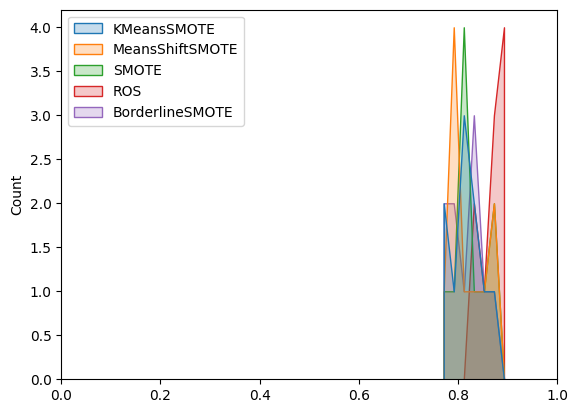

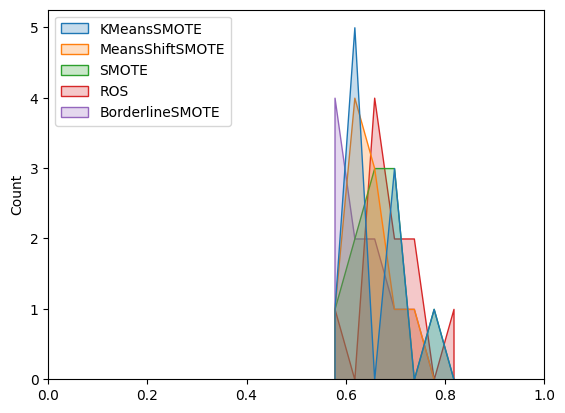

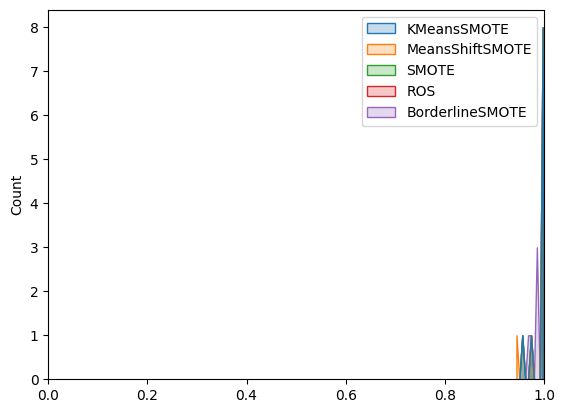

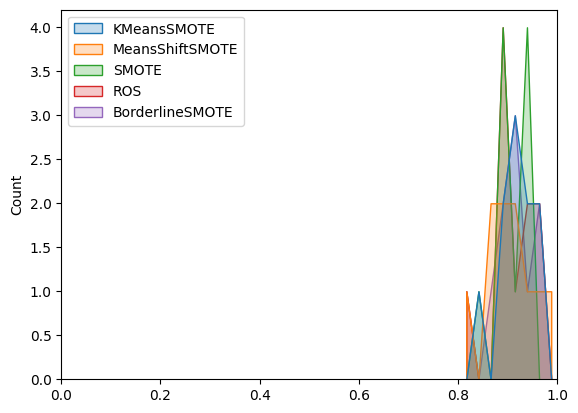

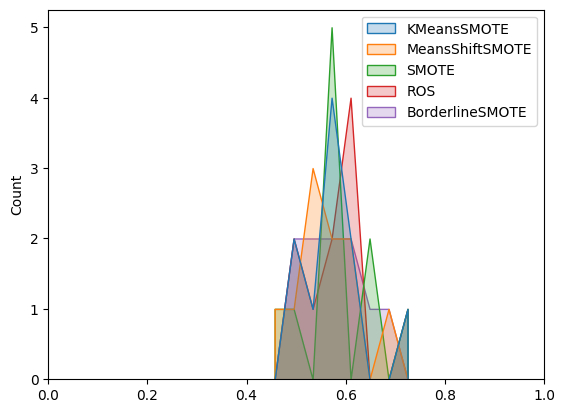

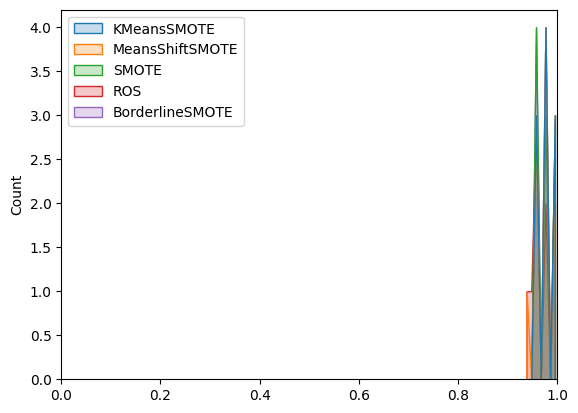

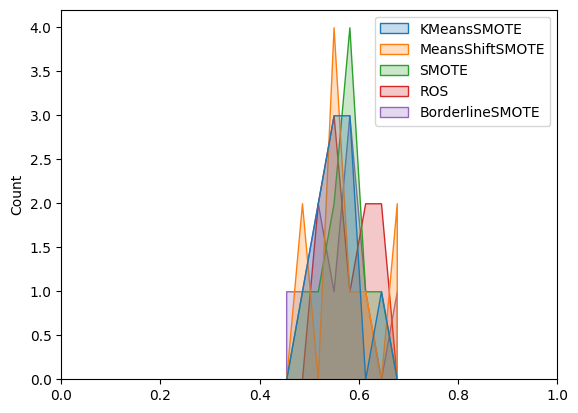

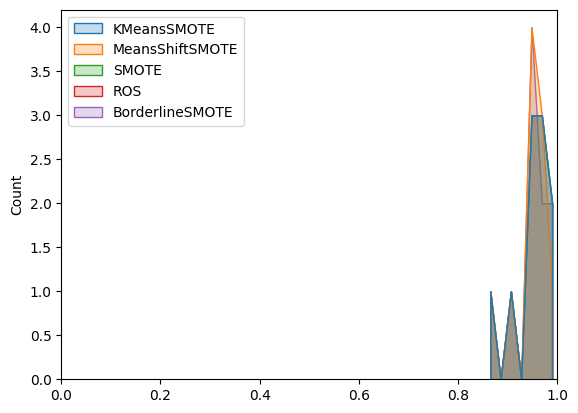

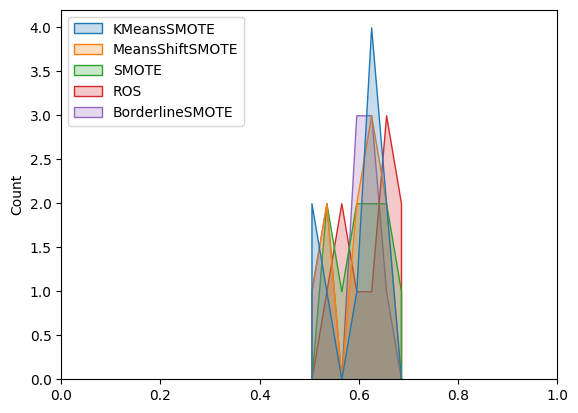

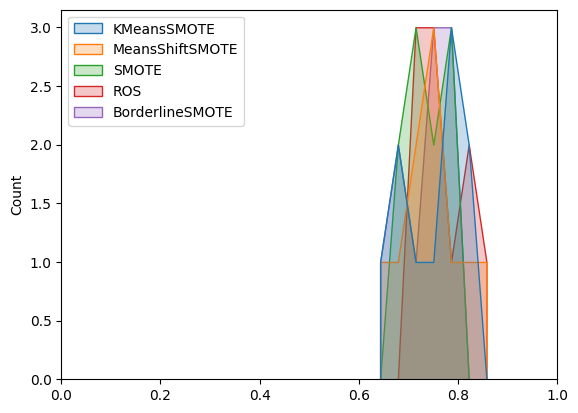

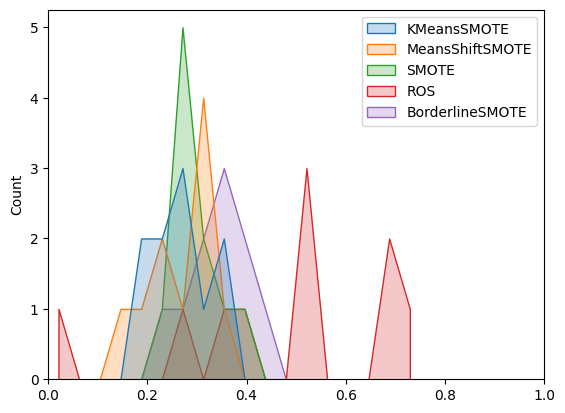

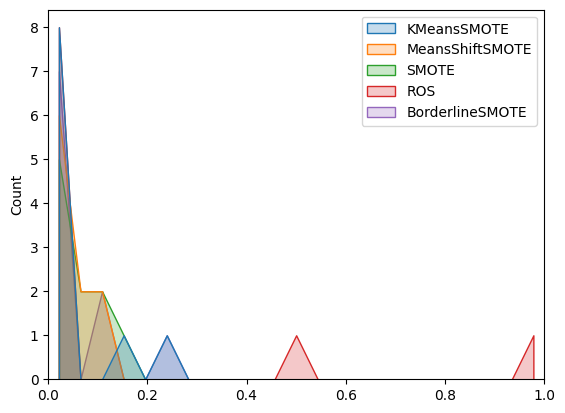

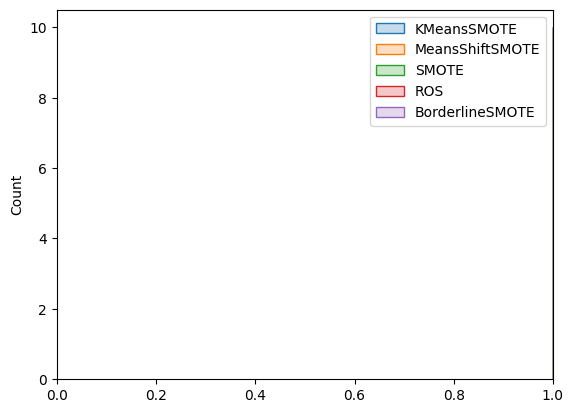

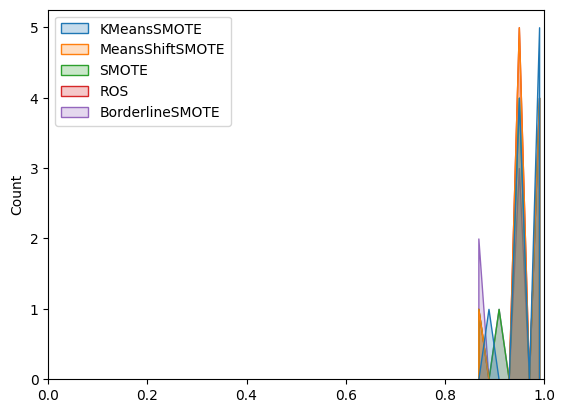

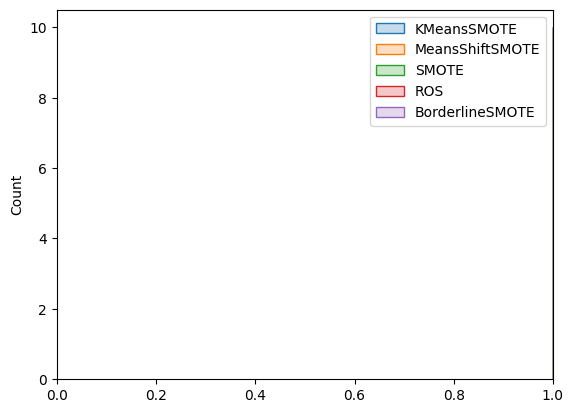

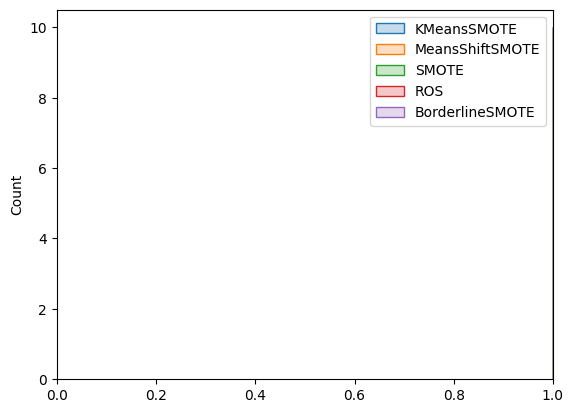

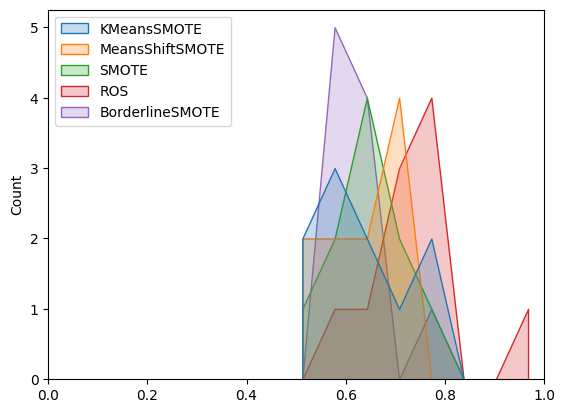

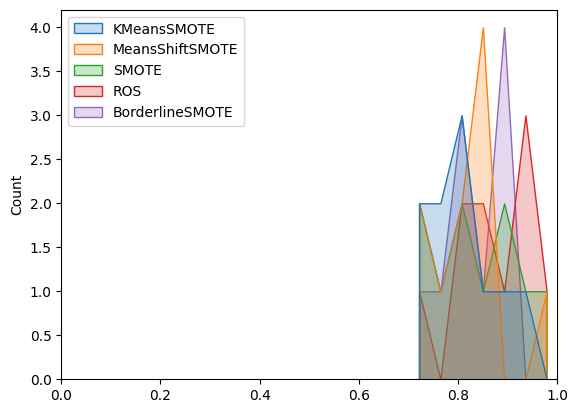

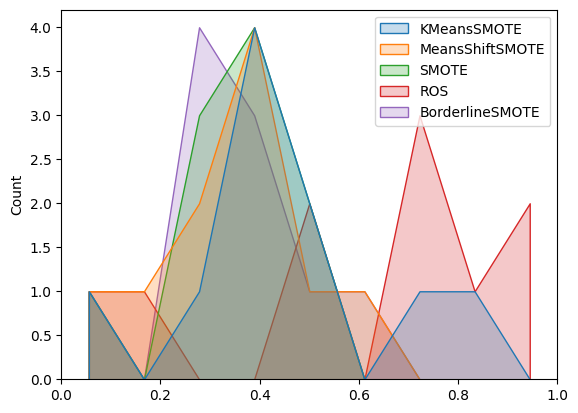

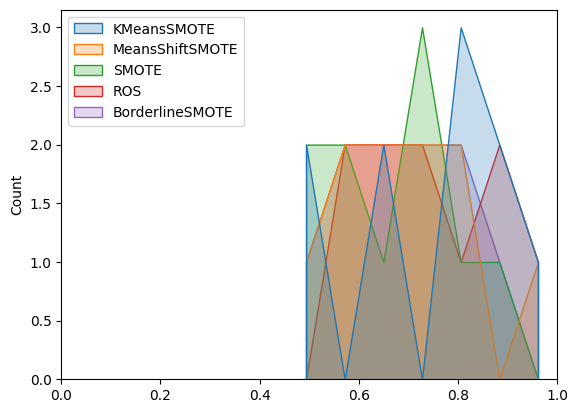

In [28]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

metricsForEval = 'precission_scores'

viewDF = pd.DataFrame()
for dataset in results:
    for method in results[dataset]:
        viewDF[method] = results[dataset][method][metricsForEval]
        for metryka in results[dataset][method]:
            print('-----dataset: {}-----'.format(dataset))
            print('-----oversampling_memthod: {}-----'.format(method))
            print('-----metryka: {}-----\n'.format(metryka))
            print(results[dataset][method][metryka])
    plt.figure(dataset)
    sns.histplot(viewDF, kde=False,element="poly").set_xlim(0,1)
    #fig = px.histogram(viewDF, nbins=100)
    #fig.show()

##### Przegląd uśrednionych statystyk dla folderu metricsForEval = 'precission_scores'

In [19]:
import os
import pandas as pd
import plotly.express as px

metricsForEval = 'precission_scores'
metricsForEval = 'recall_scores'

viewDF = pd.DataFrame()

files_in_midbalance = os.listdir('mild-imbalance')

tepm_mid_imbalance = []
tepm_high_imbalance = []

for dataset in results:
    if dataset in files_in_midbalance:
        for method in results[dataset]:
            tepm_mid_imbalance = [*tepm_mid_imbalance, *results[dataset][method][metricsForEval]]
    else:
        for method in results[dataset]:
            tepm_high_imbalance = [*tepm_high_imbalance, *results[dataset][method][metricsForEval]]

viewDF['mild-imbalance'] = tepm_mid_imbalance
viewDF['high-imbalance'] = tepm_high_imbalance
fig = px.histogram(viewDF, nbins=100, title= metricsForEval)
fig.show()

### Statistically significantly better preprocessings in given datasets with given metrics

In [20]:
from scipy.stats import ttest_rel, wilcoxon, shapiro
from tabulate import tabulate

alfa = .05
methods = ["KMeansSMOTE", "MeansShiftSMOTE", "SMOTE", "ROS", "BorderlineSMOTE"]
metrics = ["precission_scores","recall_scores","specifity_scores"]

for directory in results:
    for metric in metrics:
        w_statistic = np.zeros((len(methods), len(methods)))
        p_value = np.zeros((len(methods), len(methods)))
        test_used = np.empty((len(methods), len(methods)), dtype=object)
        for i, preprocessing_method in enumerate(methods):
            for j, comparison_preprocessing_method in enumerate(methods):
                metric_results_one = results[directory][preprocessing_method][metric]
                metric_results_two = results[directory][comparison_preprocessing_method][metric]
                tmp_p_val = 0
                try:
                    _, tmp_p_val = wilcoxon(metric_results_one, metric_results_two)
                except: 
                    _, tmp_p_val = 0, 1
                mean_metric_one = np.mean(metric_results_one)
                mean_metric_two = np.mean(metric_results_two)
                if  tmp_p_val <= alfa:
                    if mean_metric_one - mean_metric_two > 0:
                        w_statistic[i,j], p_value[i,j] = 1, 1
                    else:
                        w_statistic[i,j], p_value[i,j] = 0, 1
                else:
                    if mean_metric_one - mean_metric_two > 0:
                        w_statistic[i,j], p_value[i,j] = 1, 0
                    else:
                        w_statistic[i,j], p_value[i,j] = 0, 0
        stat_better = w_statistic * p_value
        stat_better_table = tabulate(stat_better, methods)
        print(f"Statistically significantly better {metric}:")
        print(stat_better_table)
        print()
        print()
        print()
        

Statistically significantly better precission_scores:
  KMeansSMOTE    MeansShiftSMOTE    SMOTE    ROS    BorderlineSMOTE
-------------  -----------------  -------  -----  -----------------
            0                  0        0      0                  0
            0                  0        0      0                  0
            0                  0        0      0                  0
            1                  1        1      0                  1
            0                  0        0      0                  0



Statistically significantly better recall_scores:
  KMeansSMOTE    MeansShiftSMOTE    SMOTE    ROS    BorderlineSMOTE
-------------  -----------------  -------  -----  -----------------
            0                  0        0      1                  0
            0                  0        0      1                  0
            0                  0        0      1                  0
            0                  0        0      0                  0
         

### Statistically significantly better preprocessings for all datasets

In [21]:
from scipy.stats import rankdata, ranksums

methods = ["KMeansSMOTE", "MeansShiftSMOTE", "SMOTE", "ROS", "BorderlineSMOTE"]
metrics = ["mean_precission_score", "mean_recall_scores", "mean_specifity_scores"]
for metric in metrics:
    mean = []
    for directory in results:
        preprocessing_mean = []
        for i, preprocessing_method in enumerate(methods):
            preprocessing_mean.append(results[directory][preprocessing_method][metric])
        mean.append(preprocessing_mean)

    ranks = []
    for mean_score in mean:
        ranks.append(rankdata(mean_score).tolist())
    ranks = np.array(ranks)

    alfa = .05
    w_statistic = np.zeros((len(methods), len(methods)))
    p_value = np.zeros((len(methods), len(methods)))
    for i in range(len(methods)):
        for j in range(len(methods)):
            w_statistic[i, j], p_value[i, j] = ranksums(ranks.T[i], ranks.T[j])
    names_column = np.expand_dims(np.array(list(methods)), axis=1)
    w_statistic_table = np.concatenate((names_column, w_statistic), axis=1)
    w_statistic_table = tabulate(w_statistic_table, methods, floatfmt=".2f")
    p_value_table = np.concatenate((names_column, p_value), axis=1)
    p_value_table = tabulate(p_value_table, methods, floatfmt=".2f")
    advantage = np.zeros((len(methods), len(methods)))
    advantage[w_statistic > 0] = 1
    advantage_table = tabulate(np.concatenate(
    (names_column, advantage), axis=1), methods)
    significance = np.zeros((len(methods), len(methods)))
    significance[p_value <= alfa] = 1
    statisticaly_better = advantage * significance
    statisticaly_better_table = tabulate(np.concatenate(
    (names_column, statisticaly_better), axis=1), methods)
    print(f"Metric: {metric}")
    print("Statistical significance (alpha = 0.05):")
    print(statisticaly_better_table)
    print()
    print()

Metric: mean_precission_score
Statistical significance (alpha = 0.05):
                   KMeansSMOTE    MeansShiftSMOTE    SMOTE    ROS    BorderlineSMOTE
---------------  -------------  -----------------  -------  -----  -----------------
KMeansSMOTE                  0                  1        0      0                  1
MeansShiftSMOTE              0                  0        0      0                  0
SMOTE                        0                  0        0      0                  1
ROS                          1                  1        1      0                  1
BorderlineSMOTE              0                  0        0      0                  0


Metric: mean_recall_scores
Statistical significance (alpha = 0.05):
                   KMeansSMOTE    MeansShiftSMOTE    SMOTE    ROS    BorderlineSMOTE
---------------  -------------  -----------------  -------  -----  -----------------
KMeansSMOTE                  0                  0        0      1                  0
MeansShif

# Testy parowe
## Cel testów parowych
W poprzedniej części pracy wykonano ocenę klasyfikatorów za pomocą metryk i walidacji krzyżowej. W ten sposób uzyskano osobną ocenę dla przypadków klasyfikatorów gdzie różnicami były: zbiory uczące, różne modele uczenia maszynowego oraz główny cel pracy czyli różne metody balansowania danych (sprawdzić czy niema zmian). Uzyskane wyniki należy w tym momencie porównać aby ocenić czy wyniki uzyskane w przypadkach gdzie wykorzystano metodę SMOTE wykonywaną na klastrach powstałych z danych niezbalansowanych są lepsze od pozostałych metod oversamplingu. Aby ocenić tą zależność można uśrednić uzyskane metryki i ocenić czy średnio model wykorzystujący zaproponowaną metodę oversamplingu uzyskuje lepsze wyniki, jednak test taki nie może zostać uznany za prawidłowy ponieważ mógł wynikać z przypadku. W tym celu należy wziąć pod uwagę również parametr określający jak wyniki wchodzące w skład średniej są od niej oddalone (odchylenie standardowe zbiorów). W tym celu przez badaczy wykorzystywane są testy statystyczne takie jak test T- Studenta oraz test Wilcoxona. Poniżej opisane zostaną testy które mogą zostać wykorzystane w pracy.
## Wkorzystane testy statystyczne 
Testy statystyczne wykorzystuje się dla różńych zbiorów danych aby ocenić czy różnica między nimi jest statystycznie istotna.
W tej pracy celem jest porównanie metryk dla modeli wykorzystujących mechanizm balansowania danych opartych o metodę SMOTE działającą na pojedynczych klastrach danych wejściowych oraz innych popularnie wykorzystywanych narzędzi oversamplingu. W ten sposób dane można podzielić na pary: zaproponowana w pracy metoda i inna metoda oversamplingu. Taki sposób podziału danych determinuje wykorzystanie testów parowych.
### Test T-Studenta
Test T-Studenta to test parametryczny (opierający się o porównanie parametrów populacji takich jak odchylenie standardowe czy średnia )
Warunkiem koniecznym do zastosowania testu T studenta jest założenie, że porównywane zbiory są normalne. Testowanie normalności zbiorów zostanie omówione w dalszej części pracy. Jeśli Testowanie normalności wykazało, że próbki nie są normalne wtedy można wykorzystać inne testy o mniejszej precyzji czyli testy nieparametryczne. Należy jednak napiętać, że jeśli to możliwe powinienny zostać przeprowadzone testy parametryczne takie jest test T studenta lub analiza wariancji.\
Testy statystyczne parametryczne : https://pogotowiestatystyczne.pl/slowniki/testy-parametryczne/#:~:text=Testy%20parametryczne%20to%20rodzaj%20test%C3%B3w,standardowe%20lub%20innych%20statystykach%20opisowych.
### Test Wilcoxona
Test Wilcoxona to test nieparametryczny wykonywany na bazie próbek populacji a nie na jej parametrach. Wykorzystuje on różnicę między próbkami w przypadkach wykorzystania dwóchróżnych hiperparametrów modelu. Różnica każdejz próbek zostaje zakwalifikowana do jednego ze zbiorów $T_{-}$ gdy różnica jest ujemna lub $T_{+}$ gdy jest dodatnia. W ten sposób uzyskano dwa zbiory. Wszystkim różnicom w tym momencie usuwany zostaje znak a przyznana zostaje  $ranga$(tu można walnąć dokładniejszy opis ale teraz trochę małoczasu) a następnie sumowane są wszystkie ranki w zbiorach $T_{-}$ i $T_{+}$. Pod uwagę bierze się mniejszą sumę rang oraz sprawdzana jest ona w tablicy wartości sum wag Wilxocona.
### Test założenia Normalności
Aby ocenić czy próbki pewnej populacji mają określony rozkład można wykorzystać Test Kołmogorowa-Smirnowa. Aby określić czy wyniki badań możemy ocenić za pomocą testu T studenta trzeba spełnić założenie normalności a więc określić czy próbki mogą pochodzić z wałsciwości o charakterze rozkładu normalngo. W tym celu test Kołmogorowa-Smirnowa należy wykonać dla uzyskanych wcześniej wyników i rozkładu normalnego.

biblio: https://www.scirp.org/html/6-1241391_107034.htm
https://onlinelibrary.wiley.com/doi/full/10.1002/9781118445112.stat06558

Do wykonania oceny założenia normalności wykorzystana zostanie funkcja kstest pochodząca z pakiety scipy \
Tutaj jak to robić: https://medium.com/@ricardojaviermartnezsustegui/kolmog%C3%B3rov-smirnov-test-in-python-step-by-step-1b7532021bd2

a jest jeszcze coś takiego
scipy.stats.normaltest